In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries and configuring account
import qiskit
from qiskit import QuantumCircuit, execute , Aer
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
import qiskit.providers.aer.noise as noise
from qiskit.visualization import *
from qiskit.quantum_info import *

In [104]:
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.01  # 2-qubit gate

In [105]:
# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)


In [106]:
# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['rx', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])


In [107]:
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

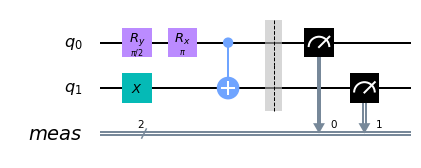

In [130]:
backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(2)
# Insert gates below to create the state
qc.ry(np.pi/2,0)
qc.rx(np.pi,0)
qc.x(1)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

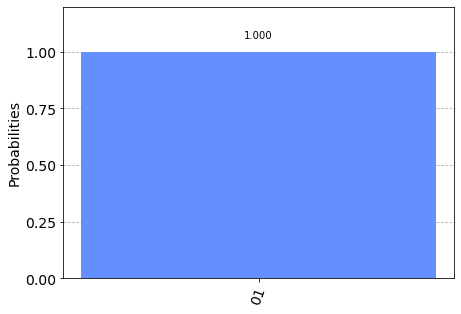

In [131]:
# Perform a noise simulation
result = execute(qc, Aer.get_backend('qasm_simulator'),shots=1,
                 basis_gates = basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

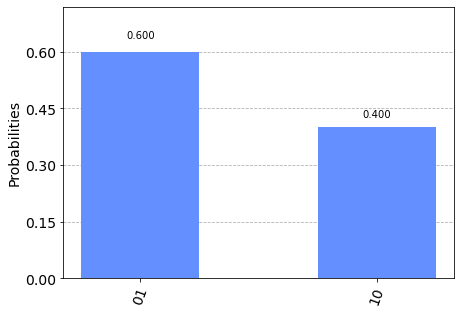

In [132]:
# Perform a noise simulation
result = execute(qc, Aer.get_backend('qasm_simulator'),shots=10,
                 basis_gates = basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

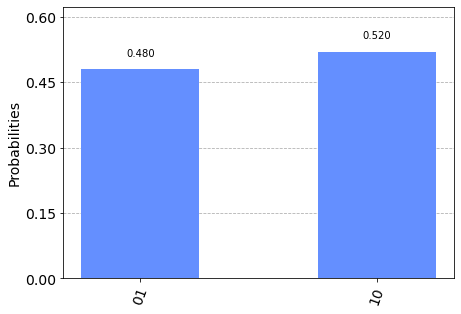

In [133]:
# Perform a noise simulation
result = execute(qc, Aer.get_backend('qasm_simulator'),shots=100,
                 basis_gates = basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

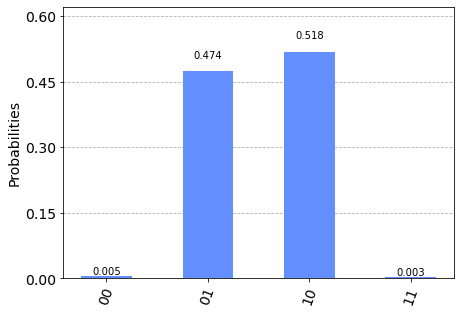

In [134]:
# Perform a noise simulation
result = execute(qc, Aer.get_backend('qasm_simulator'),shots=1000,
                 basis_gates = basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

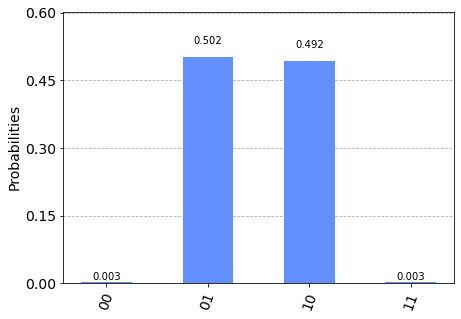

In [136]:
# Perform a noise simulation
result = execute(qc, Aer.get_backend('qasm_simulator'),shots=13000,
                 basis_gates = basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)